# **1.1. IMPORTING DATASET**

In [359]:
import pandas as pd

In [360]:
ds=pd.read_csv(r"Crude_Oil_Prices.csv")

In [361]:
ds.shape

(2547, 2)

In [362]:
ds.head

<bound method NDFrame.head of             Date  Value
0     29-10-2012  85.54
1     30-10-2012  85.68
2     31-10-2012  86.24
3     01-11-2012  87.09
4     02-11-2012  84.86
...          ...    ...
2542  12-11-2022    NaN
2543  13-11-2022    NaN
2544  14-11-2022    NaN
2545  15-11-2022    NaN
2546  16-11-2022    NaN

[2547 rows x 2 columns]>

# **1.2. IMPORTING LIBRARIES**

In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1.3. HANDLING_MISSING_VALUES**

In [364]:
ds.isnull().sum()


Date      0
Value    21
dtype: int64

In [365]:
hd=ds.dropna()
print(hd)

            Date  Value
0     29-10-2012  85.54
1     30-10-2012  85.68
2     31-10-2012  86.24
3     01-11-2012  87.09
4     02-11-2012  84.86
...          ...    ...
2521  20-10-2022  85.98
2522  21-10-2022  85.05
2523  24-10-2022  84.92
2524  25-10-2022  84.79
2525  26-10-2022  88.05

[2526 rows x 2 columns]


In [366]:
hd.isnull().sum()

Date     0
Value    0
dtype: int64

# **1.4. FEATURE_SCALING**

In [367]:
from sklearn import preprocessing

In [368]:
prepro = hd.iloc[:, 1:2].values
print ("\nOriginal data values : \n",  prepro)


Original data values : 
 [[85.54]
 [85.68]
 [86.24]
 ...
 [84.92]
 [84.79]
 [88.05]]


In [369]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(prepro)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.66062503]
 [0.66187012]
 [0.66685047]
 ...
 [0.65511108]
 [0.65395493]
 [0.68294765]]


In [370]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(prepro)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[0.86576727]
 [0.87197137]
 [0.89678778]
 ...
 [0.83829196]
 [0.83253101]
 [0.97699794]]


# **1.5. DATA_VISUALIZATION**

In [371]:
def strtodate(inp):
  import datetime
  return(datetime.datetime.strptime(inp,'%d-%m-%Y'))

hd.Date=hd.Date.apply(strtodate)
print(hd.Date)

0      2012-10-29
1      2012-10-30
2      2012-10-31
3      2012-11-01
4      2012-11-02
          ...    
2521   2022-10-20
2522   2022-10-21
2523   2022-10-24
2524   2022-10-25
2525   2022-10-26
Name: Date, Length: 2526, dtype: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [372]:
DF = pd.DataFrame()
DF['value'] = hd.Value
DF = DF.set_index(hd.Date)
DF

,value
Date,
2012-10-29,85.54
2012-10-30,85.68
2012-10-31,86.24
2012-11-01,87.09
2012-11-02,84.86
...,...
2022-10-20,85.98
2022-10-21,85.05
2022-10-24,84.92


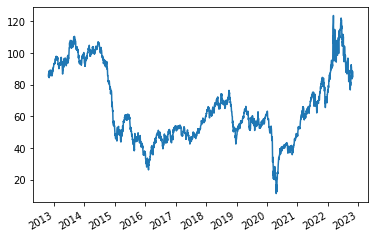

In [373]:
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

# **1.6. SPLITTING_DATA_INTO_TRAINING_DATA_AND_TESTING_DATA**

In [374]:
hd['TV1'] = hd['Value'].shift(1).rolling(window=3).mean()
hd['TV2']= hd['Value'].shift(1).rolling(window=9).mean()
hd = hd.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [375]:
x = hd[['TV1','TV2']]
x.head

<bound method NDFrame.head of             TV1        TV2
9     86.080000  85.922222
10    85.200000  85.981111
11    85.576667  85.968889
12    85.704000  85.883556
13    85.844667  85.817111
...         ...        ...
2521  85.230000  87.744444
2522  85.236667  87.004444
2523  85.670000  86.358889
2524  85.316667  85.945556
2525  84.920000  85.675556

[2517 rows x 2 columns]>

In [376]:
y = hd['Value']
y.head()

9     86.070
10    85.570
11    85.472
12    86.492
13    85.702
Name: Value, dtype: float64

In [377]:
t = int(len(hd)*0.8)

# Training dataset
x_train = x[:t]
y_train = y[:t]

# Testing dataset
x_test = x[t:]
y_test = y[t:]

In [378]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [379]:
predicted_price = model.predict(x_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Value'])

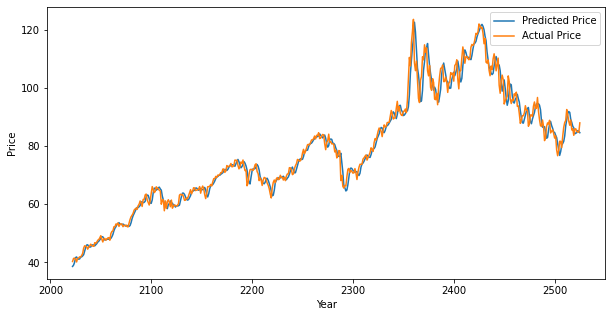

In [380]:
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()